## Project Name: House Prices: Advanced Regression Techniques

##### Problem Statement ##############

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement
 ceiling or the proximity to an east-west railroad.But this playground competition's dataset proves that 
much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, 
this competition challenges you to predict the final price of each home.


**The main aim of this project is to predict the house price based on various features which we will discuss as we go ahead**

#### Dataset to downloaded from the below link
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

In [1]:
##3 Importing libraries
import pandas as pd ## data preprocessing 
import numpy as np  ## mathmatical calculation
import matplotlib.pyplot as plt 
import seaborn as sns

pd.pandas.set_option('display.max_columns' , None)

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
df_train = pd.concat([train, test])
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [3]:
df_train.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,80,32,0,0,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,2Story,7,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,BrkFace,94.0,TA,TA,PConc,Gd,TA,Av,LwQ,758.0,Unf,0.0,238.0,996.0,GasA,Ex,Y,SBrkr,996,1004,0,2000,0.0,0.0,2,1,3,1,TA,9,Typ,1,TA,Attchd,1993.0,Fin,3.0,650.0,TA,TA,Y,190,48,0,0,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal,NaN


In [4]:
df_train.shape

(2919, 81)

In [5]:
train.shape

(1460, 81)

In [6]:
test.shape

(1459, 80)

## EDA and Feature Engineering

In [7]:
duplicate = df_train[df_train.duplicated()]
print(duplicate)

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [9]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2917.000000,2917.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2760.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,560.772104,1051.777587,1159.581706,336.483727,4.694416,1500.759849,0.429894,0.061364,1.568003,0.380267,2.860226,1.044536,6.451524,0.597122,1978.113406,1.766621,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,439.543659,440.766258,392.362079,428.701456,46.396825,506.051045,0.524736,0.245687,0.552969,0.502872,0.822693,0.214462,1.569379,0.646129,25.574285,0.761624,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,220.000000,793.000000,876.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,467.000000,989.500000,1082.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,805.500000,1302.000000,1387.500000,704.000000,0.000000,1743.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


### Handling numerical  Missing values

**1. For Continious**

In [10]:
# missing_values_continious = [feature for feature in df_train.columns if df_train[feature].dtype != "O" and len(df_train[feature].unique()) >20 and df_train[feature].isnull().sum()>0]
# missing_values_continious

In [11]:
len(df_train["LotFrontage"].unique())

129

In [12]:
missing_values_continious = []
for feature in df_train.columns:
    if df_train[feature].dtype != "object" and len(df_train[feature].unique())>20:
        missing_values_continious.append(feature)
missing_values_continious    

['Id',
 'LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'MiscVal',
 'SalePrice']

In [13]:
for feature in missing_values_continious:
    print(feature, round(df_train[feature].isnull().mean() , 2) * 100)

Id 0.0
LotFrontage 17.0
LotArea 0.0
YearBuilt 0.0
YearRemodAdd 0.0
MasVnrArea 1.0
BsmtFinSF1 0.0
BsmtFinSF2 0.0
BsmtUnfSF 0.0
TotalBsmtSF 0.0
1stFlrSF 0.0
2ndFlrSF 0.0
LowQualFinSF 0.0
GrLivArea 0.0
GarageYrBlt 5.0
GarageArea 0.0
WoodDeckSF 0.0
OpenPorchSF 0.0
EnclosedPorch 0.0
3SsnPorch 0.0
ScreenPorch 0.0
MiscVal 0.0
SalePrice 50.0


In [14]:
median_value = df_train["GarageYrBlt"].median()

In [15]:
median_value

1979.0

In [16]:
for feature in missing_values_continious:
    if feature == "SalePrice":
        pass
    else:        
        median_value = df_train[feature].median()
        df_train[feature].fillna(median_value,inplace=True)    

In [17]:
for feature in missing_values_continious:
    print(feature, round(df_train[feature].isnull().mean(),4)*100)

Id 0.0
LotFrontage 0.0
LotArea 0.0
YearBuilt 0.0
YearRemodAdd 0.0
MasVnrArea 0.0
BsmtFinSF1 0.0
BsmtFinSF2 0.0
BsmtUnfSF 0.0
TotalBsmtSF 0.0
1stFlrSF 0.0
2ndFlrSF 0.0
LowQualFinSF 0.0
GrLivArea 0.0
GarageYrBlt 0.0
GarageArea 0.0
WoodDeckSF 0.0
OpenPorchSF 0.0
EnclosedPorch 0.0
3SsnPorch 0.0
ScreenPorch 0.0
MiscVal 0.0
SalePrice 49.980000000000004


In [18]:
df_train.drop("Id" , inplace=True , axis = 1)

**2. For Descrete**

In [19]:
#missing_values_descrete = [feature for feature in df_train.columns if df_train[feature].dtype != "O" and len(df_train[feature].unique()) <20 and df_train[feature].isnull().sum()>0]
#missing_values_descrete

In [20]:
missing_values_descrete = []
for feature in df_train.columns:
    if df_train[feature].dtype != "object" and len(df_train[feature].unique()) <=20:
        missing_values_descrete.append(feature)
len(missing_values_descrete)        

15

In [21]:
for feature in missing_values_descrete:
    print(feature, round(df_train[feature].isnull().mean(),4)*100)

MSSubClass 0.0
OverallQual 0.0
OverallCond 0.0
BsmtFullBath 0.06999999999999999
BsmtHalfBath 0.06999999999999999
FullBath 0.0
HalfBath 0.0
BedroomAbvGr 0.0
KitchenAbvGr 0.0
TotRmsAbvGrd 0.0
Fireplaces 0.0
GarageCars 0.03
PoolArea 0.0
MoSold 0.0
YrSold 0.0


In [22]:
df_train["GarageCars"].mode()[0]

2.0

In [23]:
for feature in missing_values_descrete:
    mode_value = df_train[feature].mode()[0]
    df_train[feature].fillna(mode_value,inplace=True)

In [24]:
for feature in missing_values_descrete:
    print(feature, round(df_train[feature].isnull().mean(),4)*100)

MSSubClass 0.0
OverallQual 0.0
OverallCond 0.0
BsmtFullBath 0.0
BsmtHalfBath 0.0
FullBath 0.0
HalfBath 0.0
BedroomAbvGr 0.0
KitchenAbvGr 0.0
TotRmsAbvGrd 0.0
Fireplaces 0.0
GarageCars 0.0
PoolArea 0.0
MoSold 0.0
YrSold 0.0


### Handling categorical missing values

In [25]:
#missing_values_c = [feature for feature in df_train.columns if df_train[feature].dtype == "O" and df_train[feature].isnull().sum()>0]
#missing_values_c

In [26]:
missing_values_c = []
for feature in df_train.columns:
    if df_train[feature].dtype == "O" and df_train[feature].isnull().sum()>0:
        missing_values_c.append(feature)
len(missing_values_c)        

23

In [27]:
for feature in missing_values_c:
    print(feature, round(df_train[feature].isnull().mean(),4)*100)

MSZoning 0.13999999999999999
Alley 93.22
Utilities 0.06999999999999999
Exterior1st 0.03
Exterior2nd 0.03
MasVnrType 0.8200000000000001
BsmtQual 2.77
BsmtCond 2.81
BsmtExposure 2.81
BsmtFinType1 2.71
BsmtFinType2 2.74
Electrical 0.03
KitchenQual 0.03
Functional 0.06999999999999999
FireplaceQu 48.65
GarageType 5.38
GarageFinish 5.45
GarageQual 5.45
GarageCond 5.45
PoolQC 99.66000000000001
Fence 80.44
MiscFeature 96.39999999999999
SaleType 0.03


In [28]:
for feature in missing_values_c:
    mode_value = df_train[feature].mode()[0]
    df_train[feature].fillna(mode_value,inplace=True)    
df_train.drop(["Alley" ,"PoolQC", "Fence" , "MiscFeature"  , "FireplaceQu" ] , axis = 1 , inplace = True)

In [29]:
df_train.isnull().sum()

MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
Street              0
                 ... 
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
SalePrice        1459
Length: 75, dtype: int64

In [30]:
df_train.shape

(2919, 75)

In [31]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000.0


### Handling year feature

In [32]:
#year = [feature for feature in df_train.columns if "Yr" in feature or "Year" in feature] 
#year

In [33]:
year = []
for feature in df_train.columns:
    if "Yr" in feature or "Year" in feature:
        year.append(feature)
year

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [34]:
for feature in year:
    print(feature, len(df_train[feature].unique()) , df_train[feature].dtype)

YearBuilt 118 int64
YearRemodAdd 61 int64
GarageYrBlt 103 float64
YrSold 5 int64


In [35]:
df_train["YrSold"].value_counts()

2007    692
2009    647
2008    622
2006    619
2010    339
Name: YrSold, dtype: int64

In [36]:
df_train['SalePrice'].median()

163000.0

Text(0.5, 1.0, 'House Price vs YearSold')

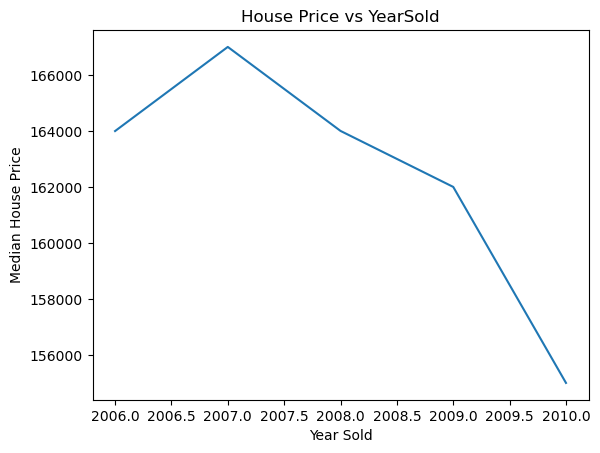

In [37]:
df_train.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title("House Price vs YearSold")

In [154]:
for feature in year:       
    df_train[feature] = df_train['YrSold']-df_train[feature]
df_train.drop("YrSold", axis = 1 , inplace = True)

KeyError: 'YrSold'

In [39]:
df_train.shape

(2919, 74)

In [40]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,Attchd,5.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,0,2,WD,Normal,208500.0
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,Attchd,31.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,0,5,WD,Normal,181500.0
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,Attchd,7.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,0,9,WD,Normal,223500.0
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Detchd,8.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,0,2,WD,Abnorml,140000.0
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,Attchd,8.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,0,12,WD,Normal,250000.0


### Handling continious values

In [41]:
#continious = [feature for feature in df_train.columns if len(df_train[feature].unique())>20 and df_train[feature].dtype != "O" and feature not in year]
#continious

In [42]:
continious = []
for feature in df_train.columns:
     if df_train[feature].dtype != "O" and len(df_train[feature].unique())>20  and feature not in year:
            continious.append(feature)
continious         

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'MiscVal',
 'SalePrice']

In [43]:
df_train["LotFrontage"].skew()

1.6757127932619122

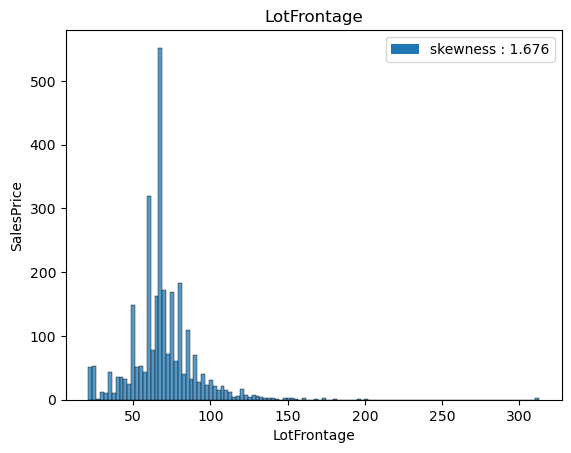

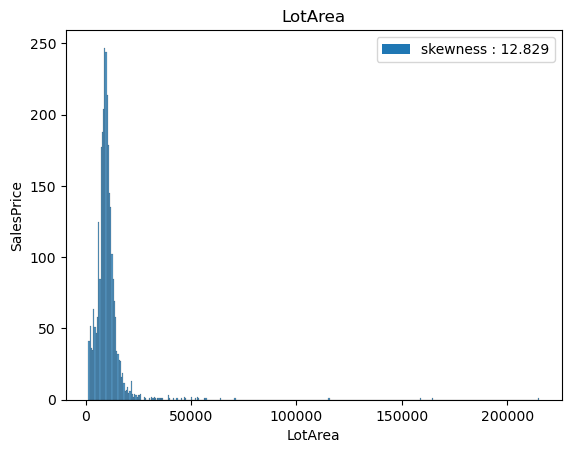

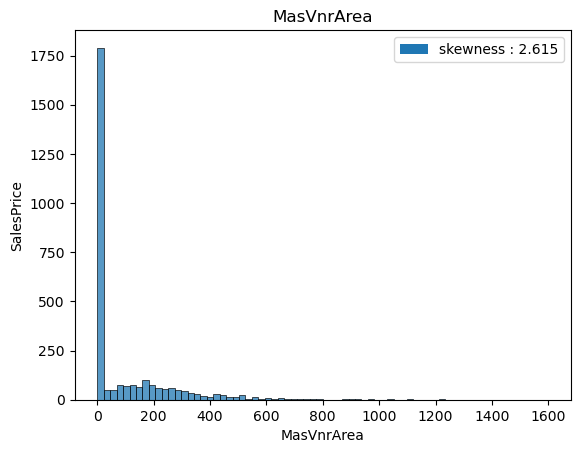

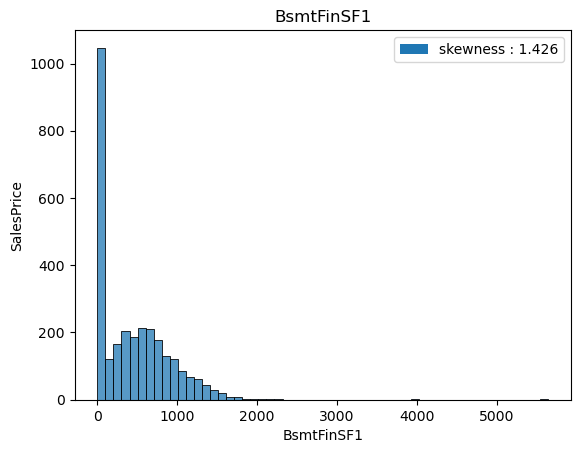

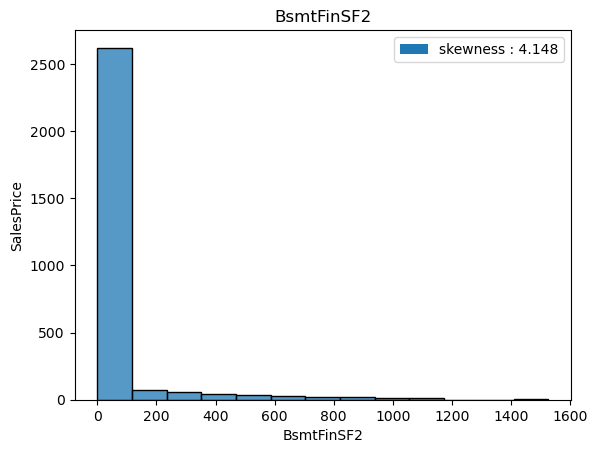

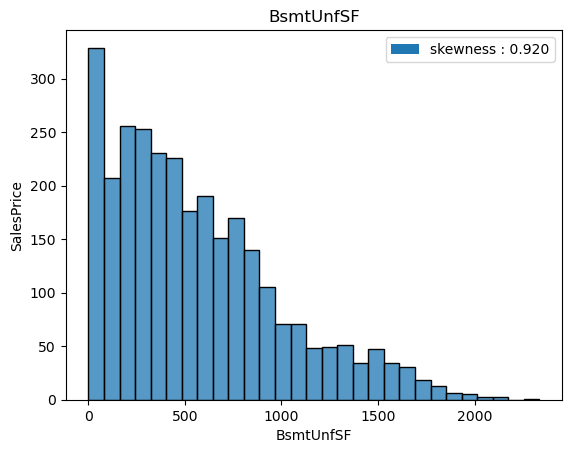

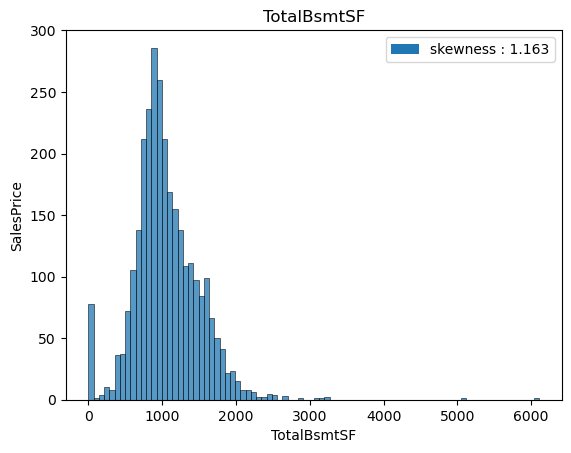

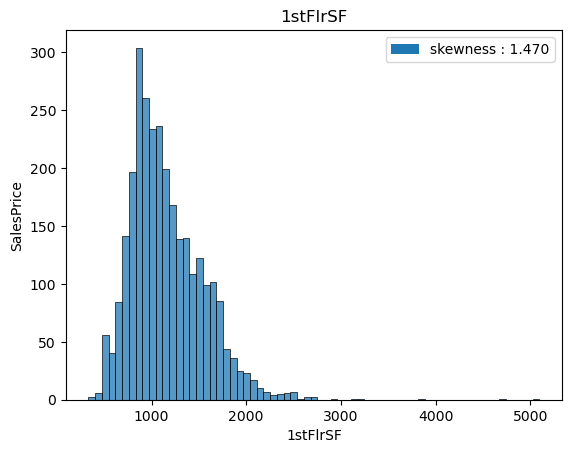

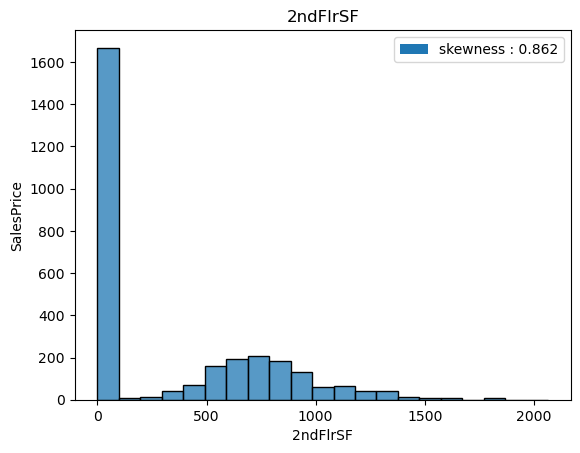

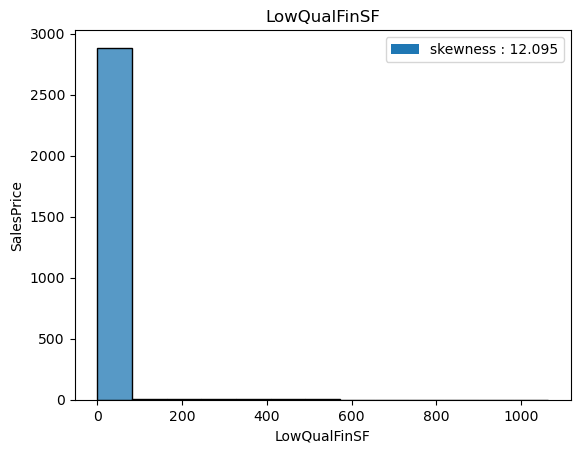

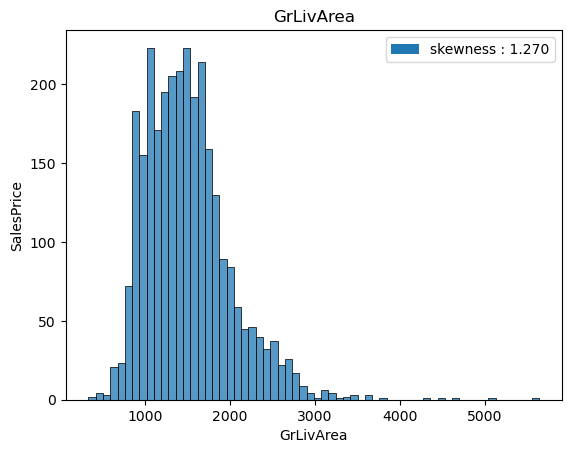

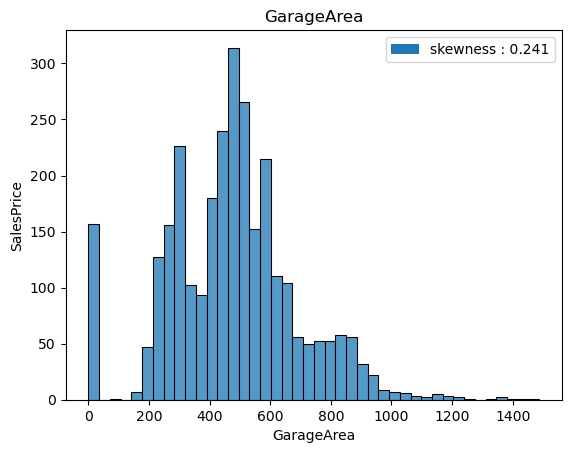

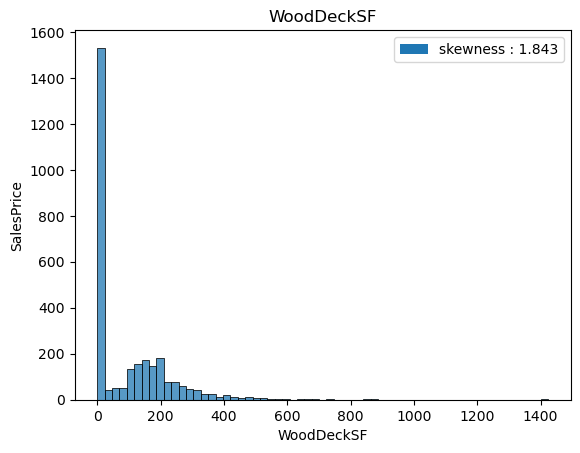

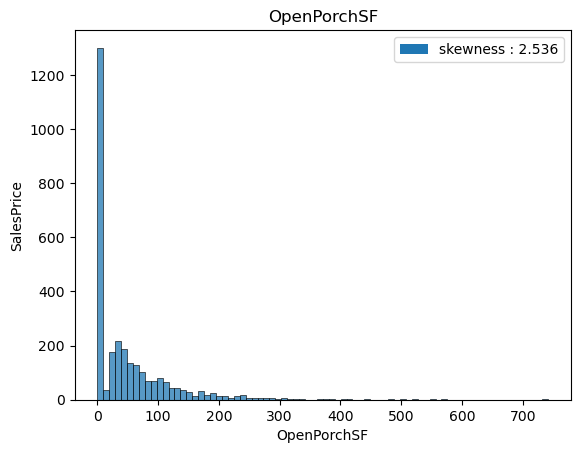

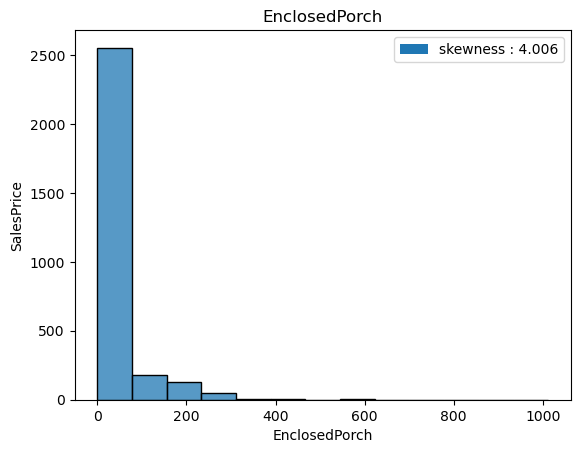

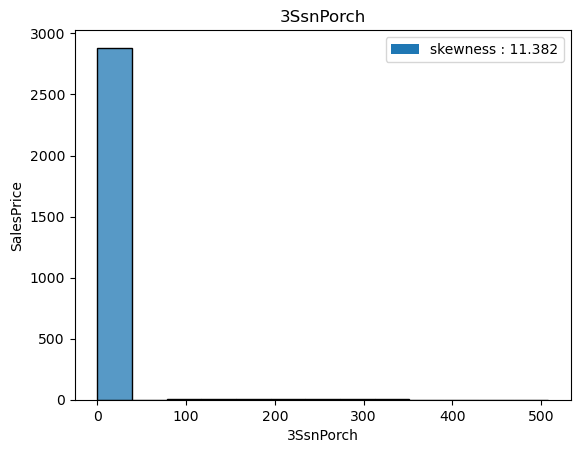

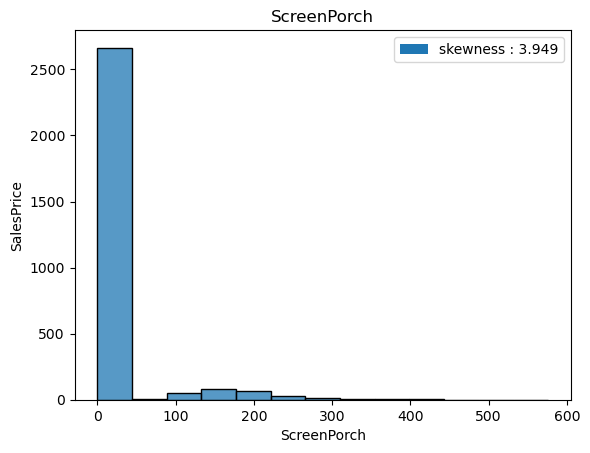

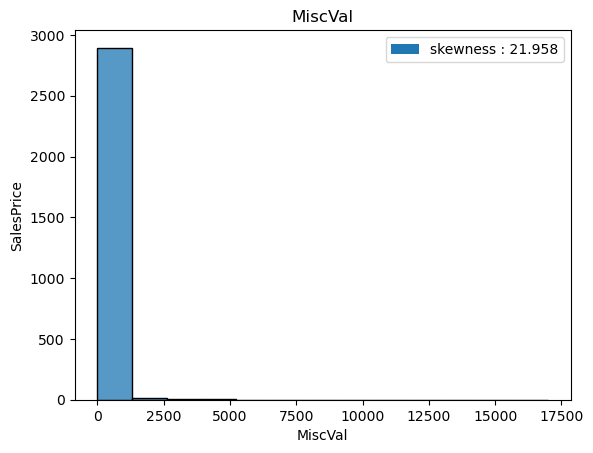

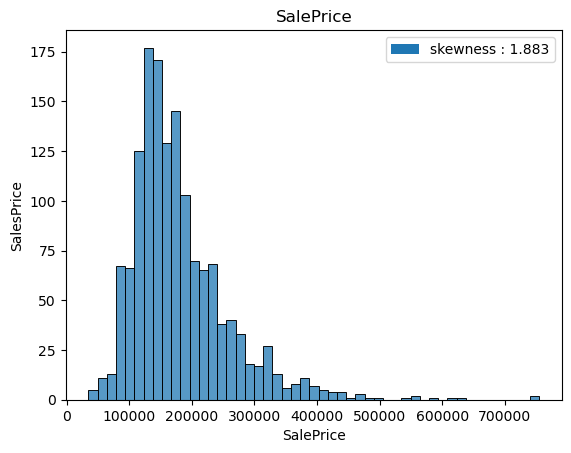

In [44]:
## We will be using logarithmic transformation
for feature in continious:
    data = df_train.copy()
    #data[feature]=np.log1p(data[feature])
    ax = sns.histplot(data[feature])
    ax.legend(["skewness : {:0.3f}".format(data[feature].skew())])
    plt.xlabel(feature)
    plt.ylabel('SalesPrice')
    plt.title(feature)
    plt.show() 

In [45]:
#skewed = [feature for feature in continious if data[feature].skew()<1]
#skewed

In [46]:
skewed = []
for feature in continious:
    if abs(df_train[feature].skew())>1:
        skewed.append(feature)
skewed        

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'TotalBsmtSF',
 '1stFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'MiscVal',
 'SalePrice']

In [47]:
abs(-5)

5

In [48]:
for feature in continious:
    if feature == "SalePrice":
        pass
    else:        
        df_train[feature] = np.log1p(df_train[feature])

In [49]:
df_train.shape

(2919, 74)

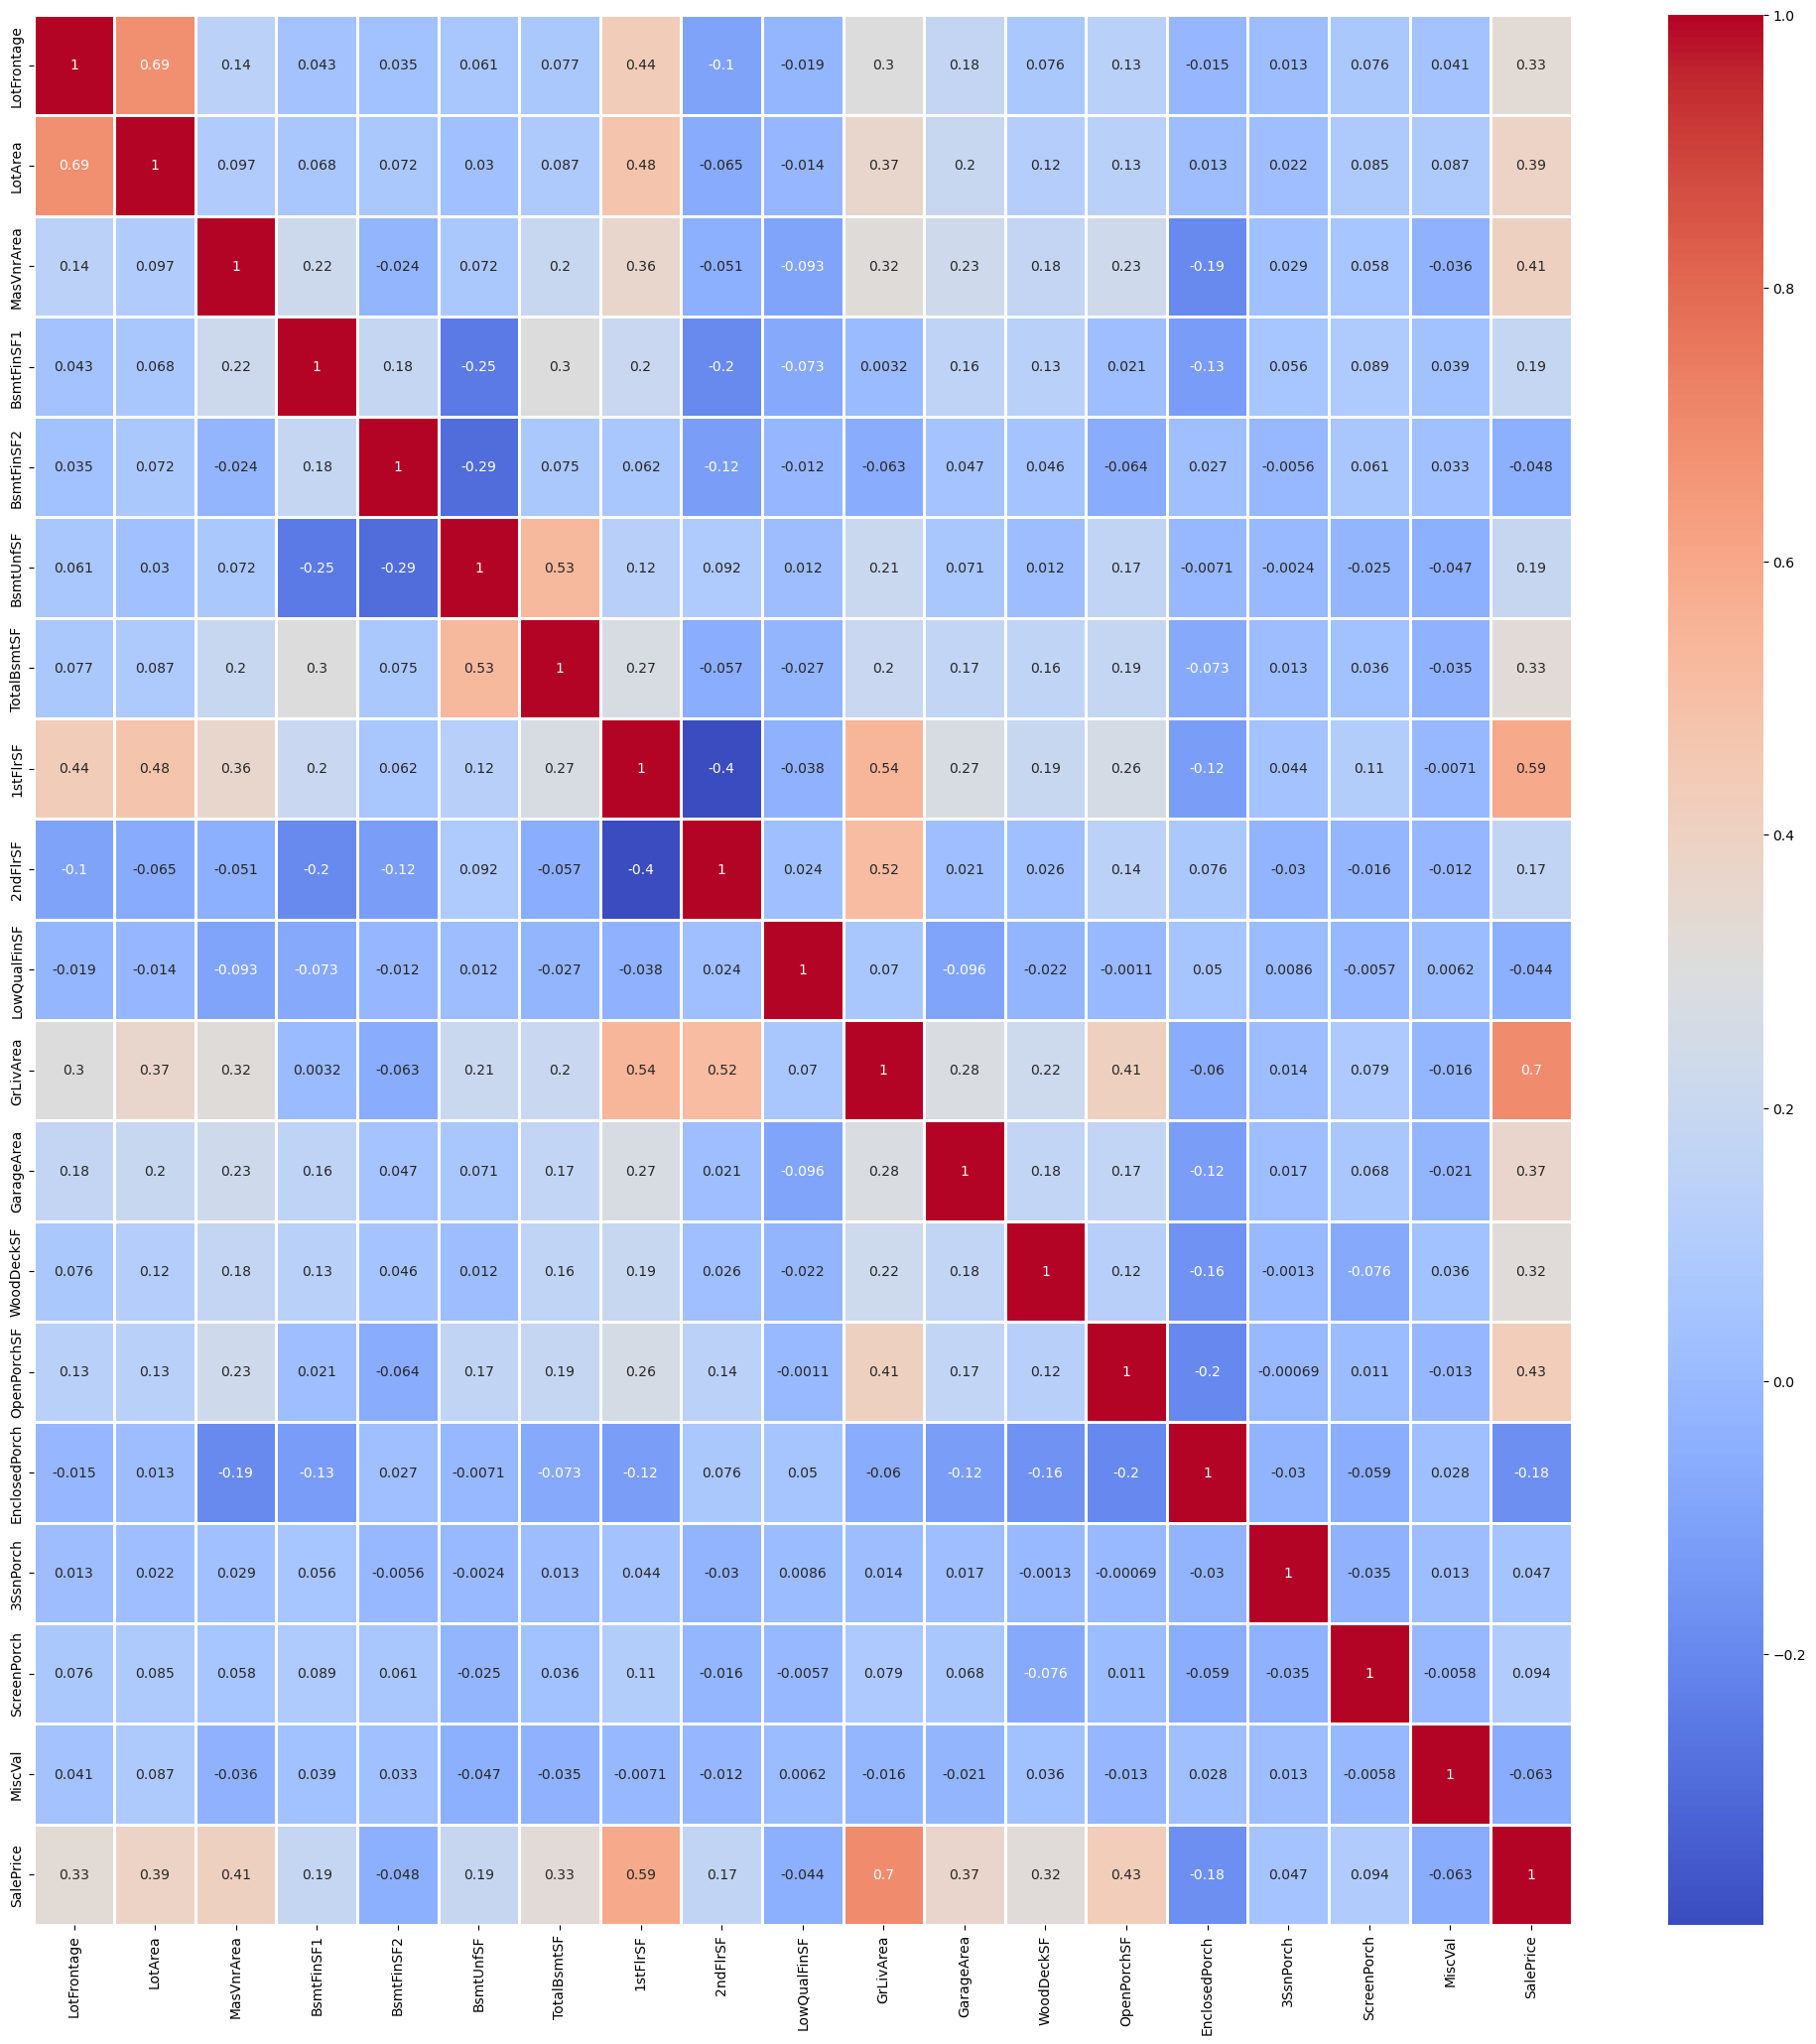

In [50]:
# correlation heatmap
plt.figure(figsize=(25,25))
ax = sns.heatmap(df_train[continious].corr(), cmap = "coolwarm", annot=True, linewidth=2)

# to fix the bug "first and last row cut in half of heatmap plot"
# bottom, top = ax.get_ylim()
# ax.set_ylim(bottom + 0.5, top - 0.5)

In [51]:
# correlation heatmap of higly correlated features with SalePrice
low_corr = df_train[continious].corr()
low_corr_features = low_corr.index[low_corr["SalePrice"] < 0.10]
low_corr_features

Index(['BsmtFinSF2', 'LowQualFinSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'MiscVal'],
      dtype='object')

In [52]:
df_train.drop(low_corr_features , axis = 1 , inplace = True)

In [53]:
df_train.shape

(2919, 68)

### Handling categorical variables

In [54]:
#categorical = [feature for feature in df_train.columns if df_train[feature].dtype == "O"]
#len(categorical)

In [55]:
categorical = []
for feature in df_train.columns:
    if df_train[feature].dtype == "object":
        categorical.append(feature)
len(categorical)

38

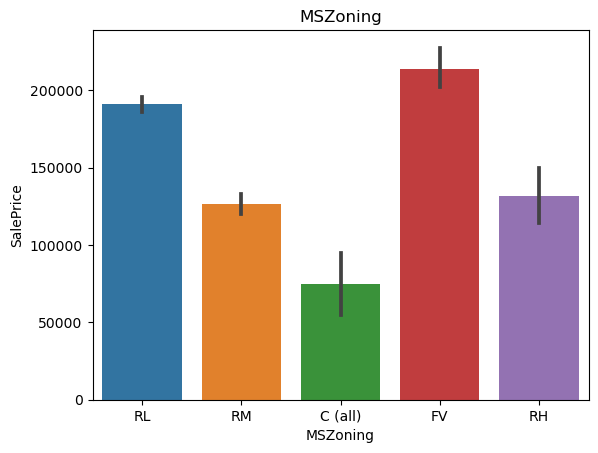

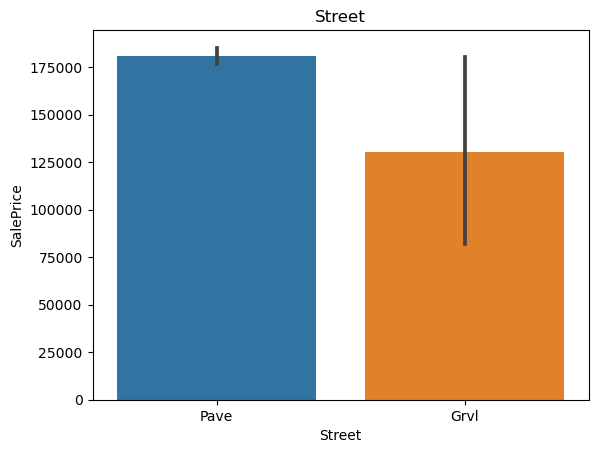

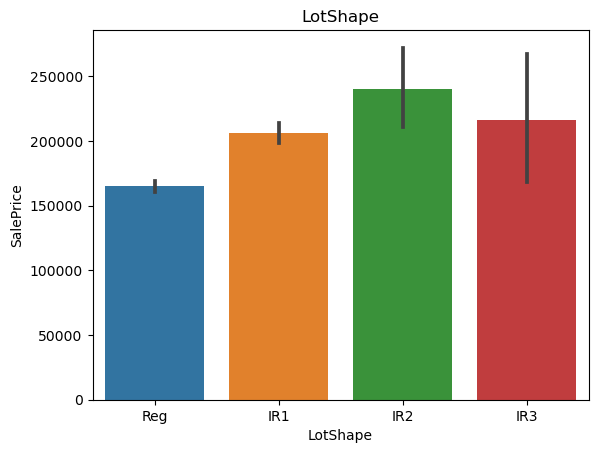

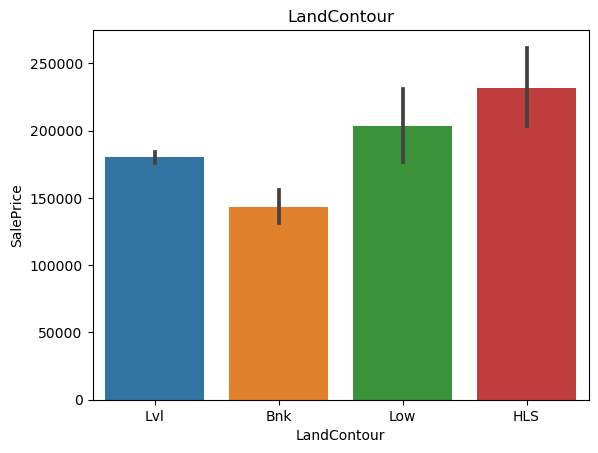

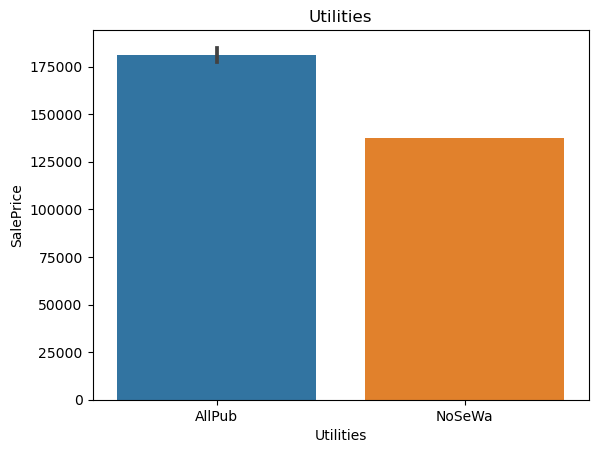

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


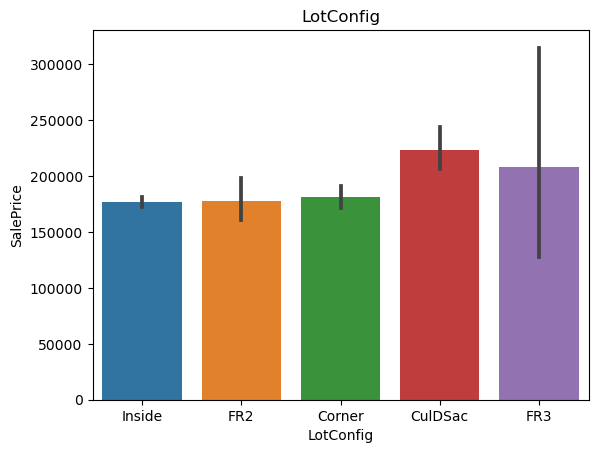

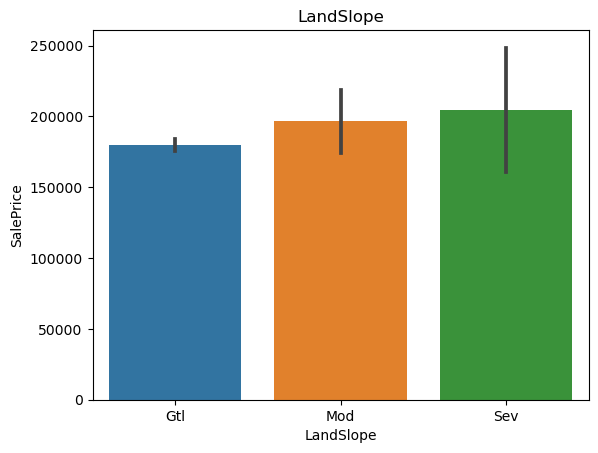

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


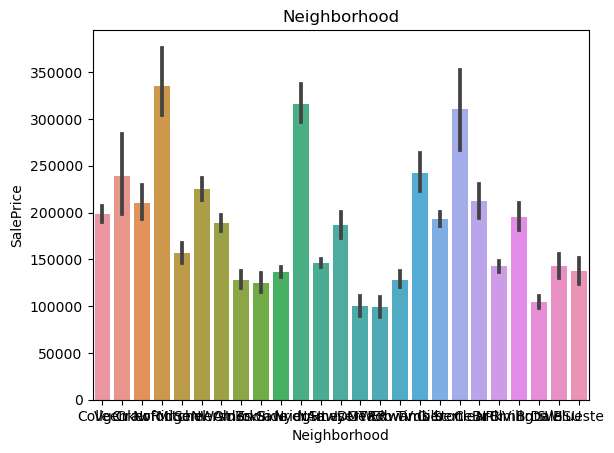

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


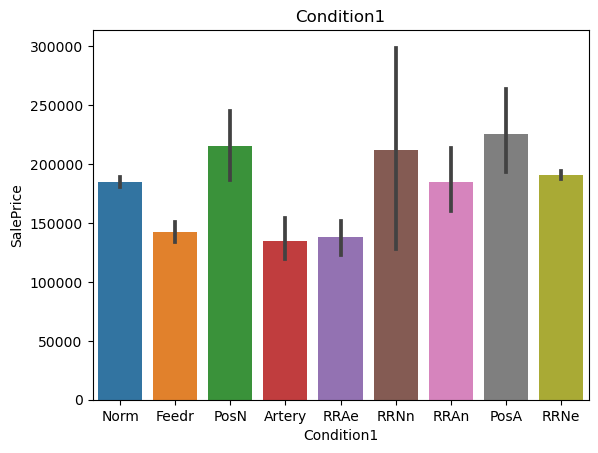

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


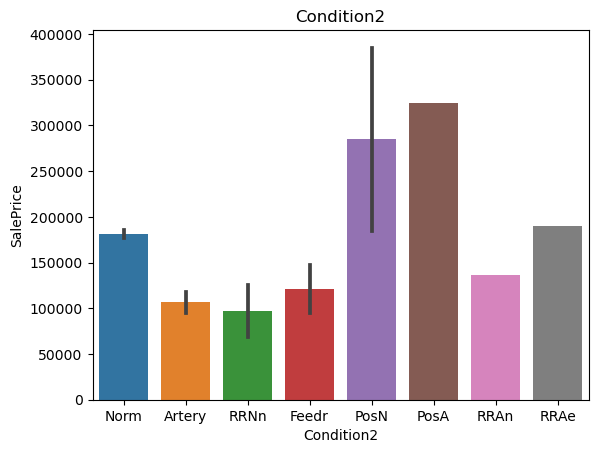

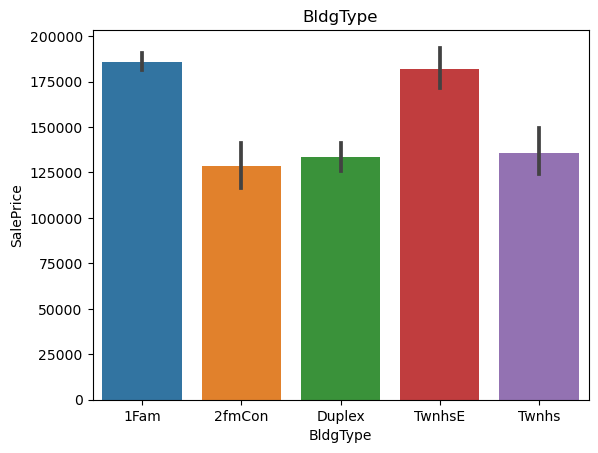

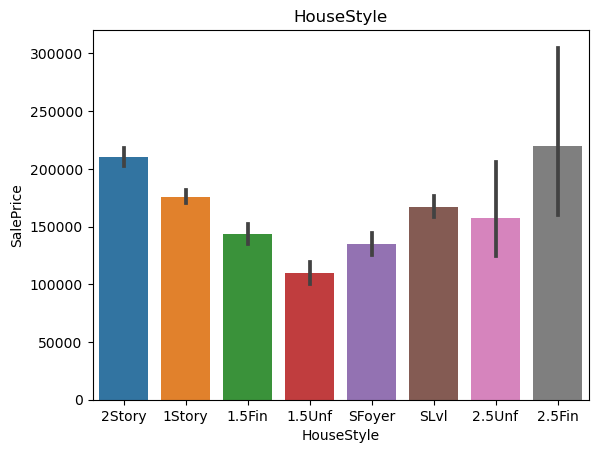

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


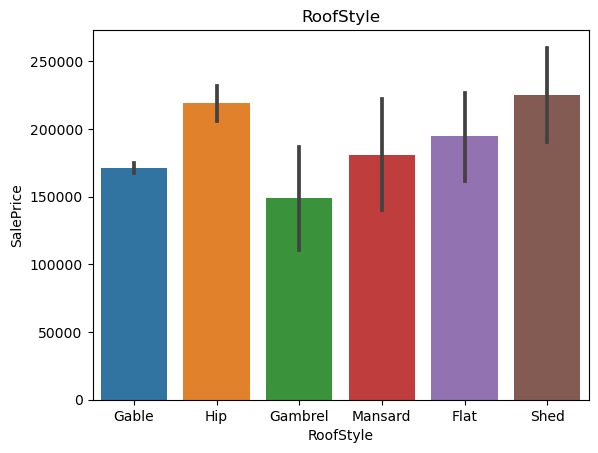

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


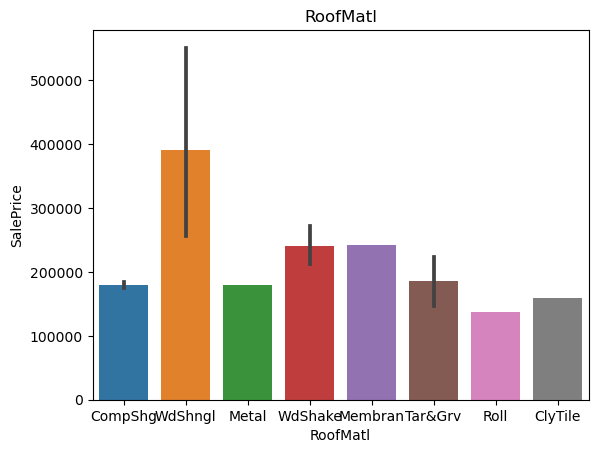

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


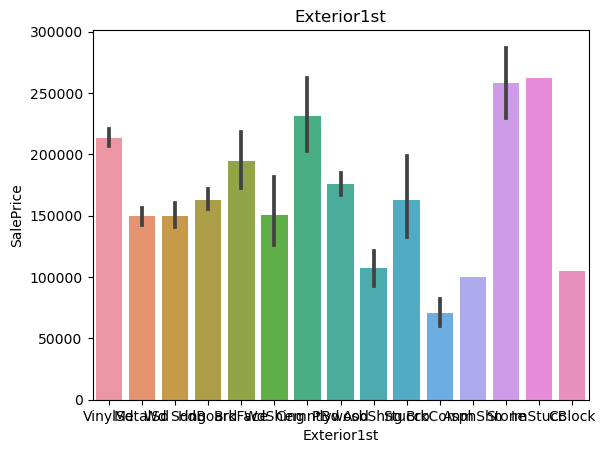

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


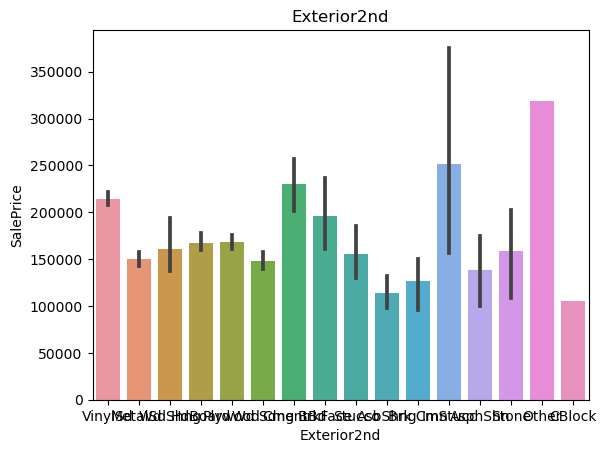

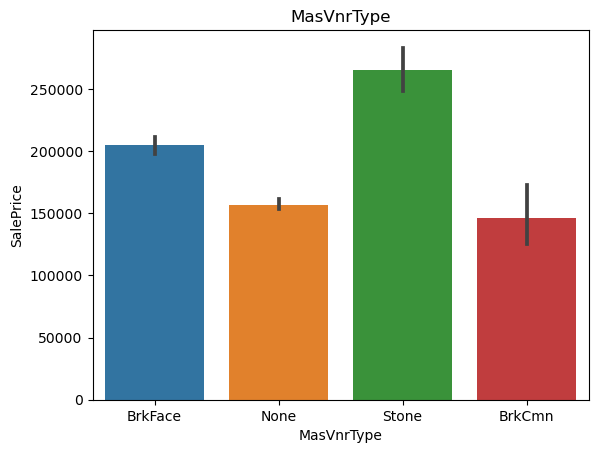

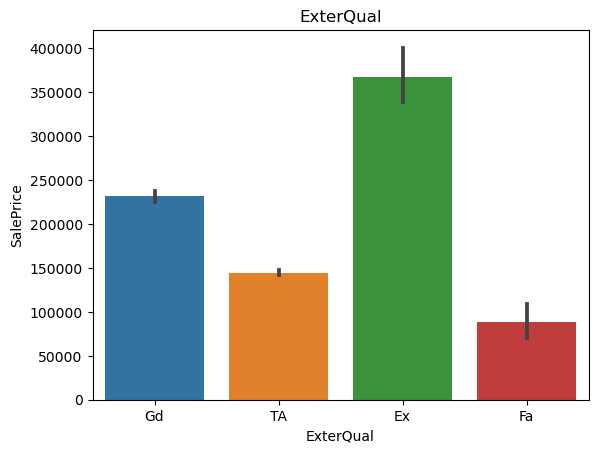

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


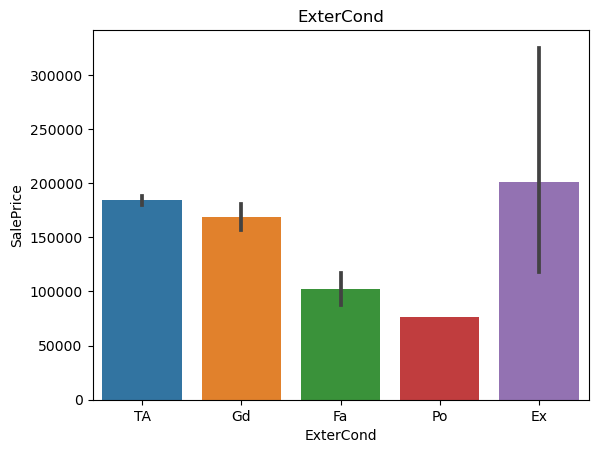

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


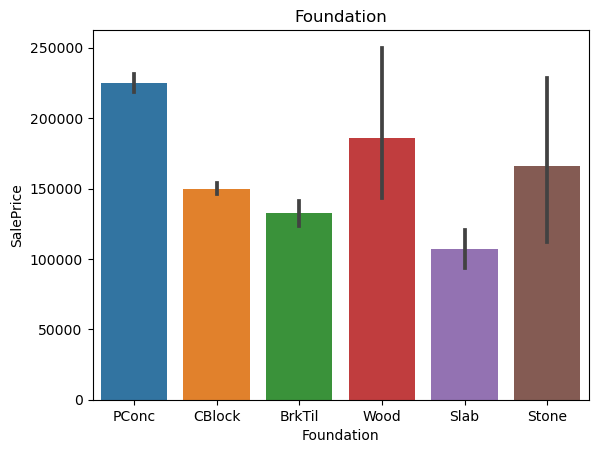

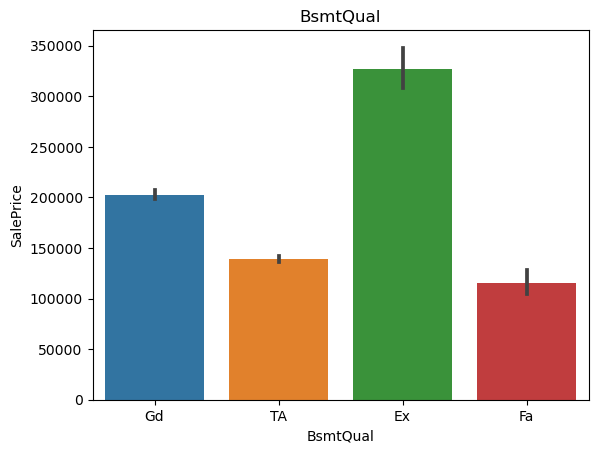

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


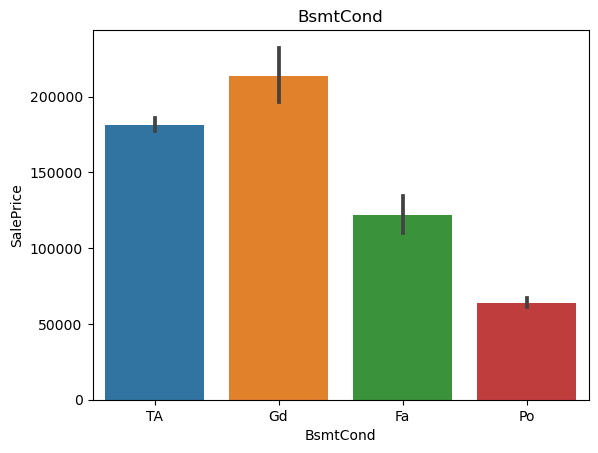

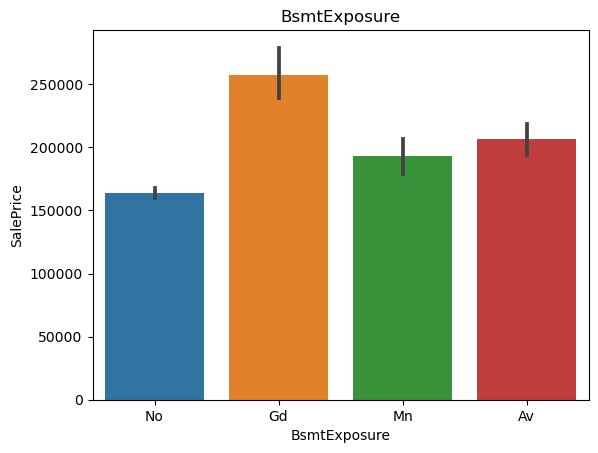

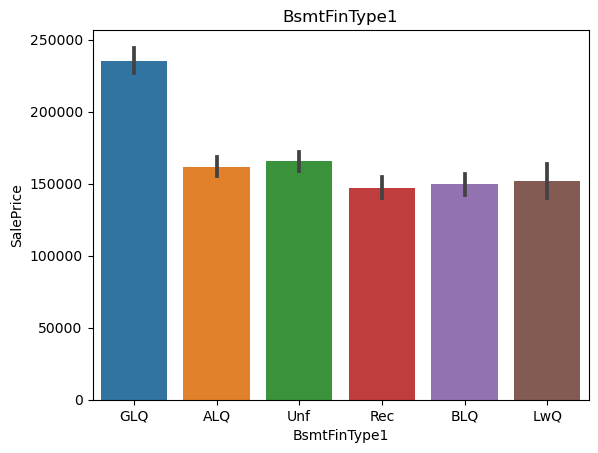

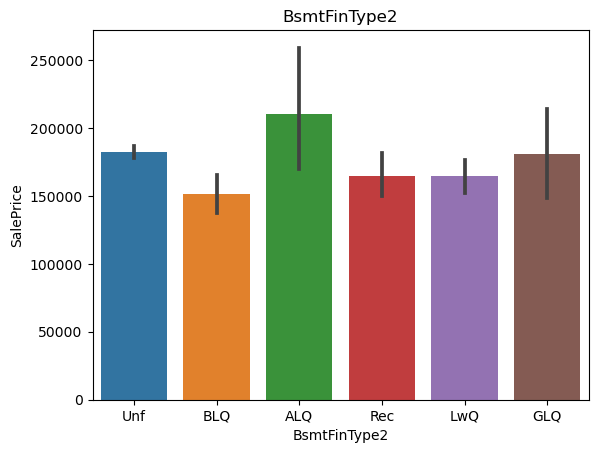

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


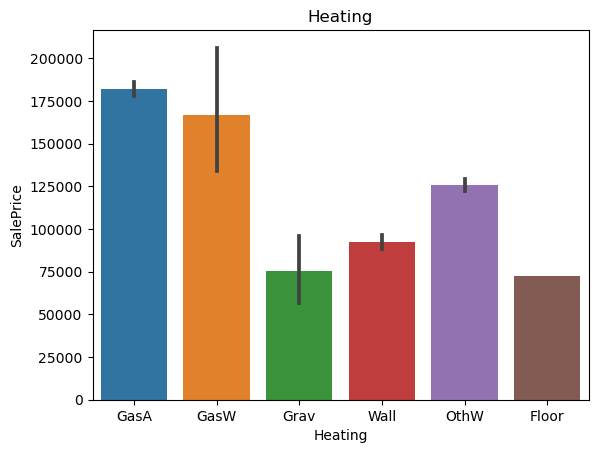

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


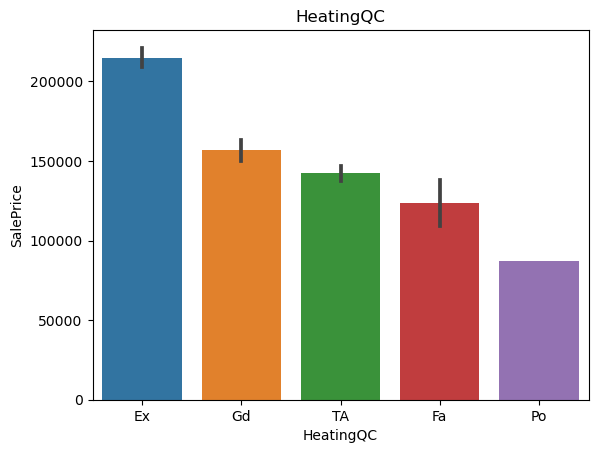

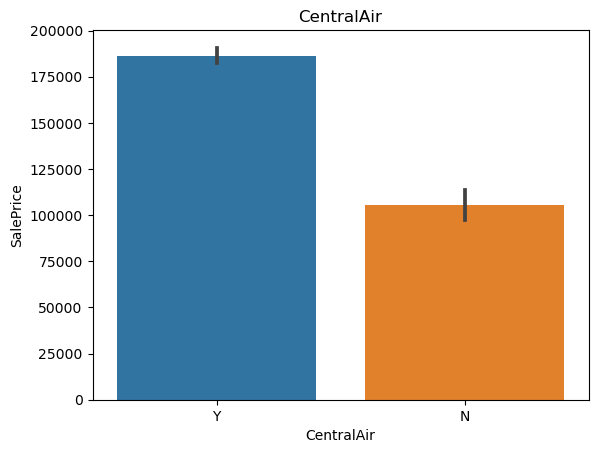

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


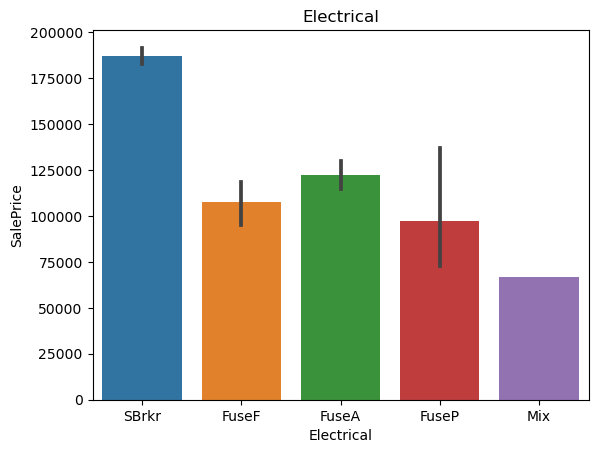

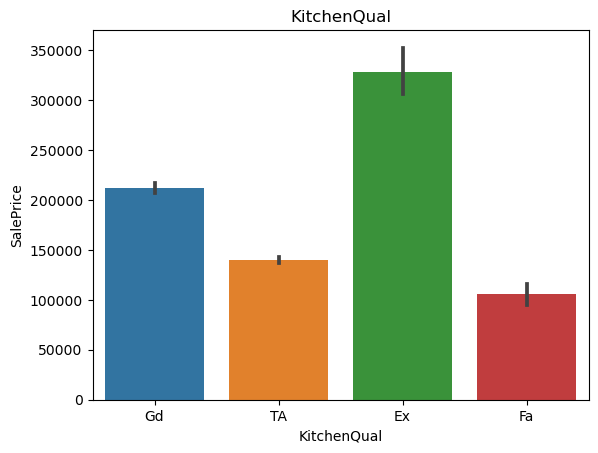

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


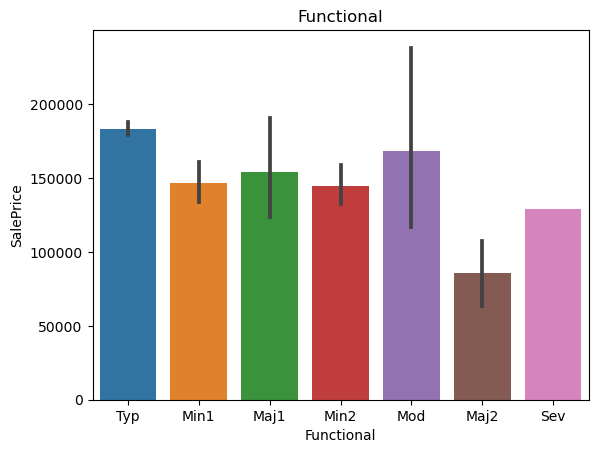

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


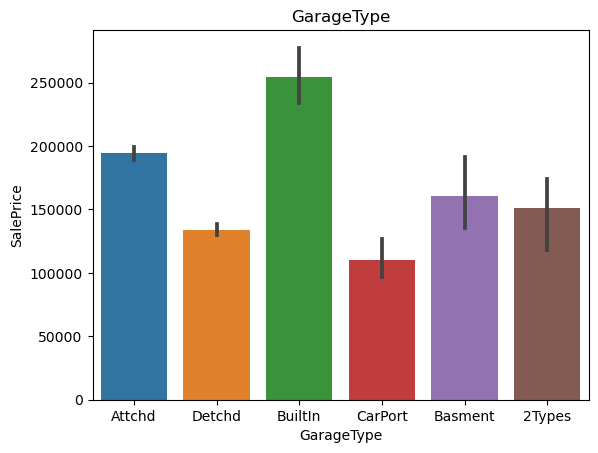

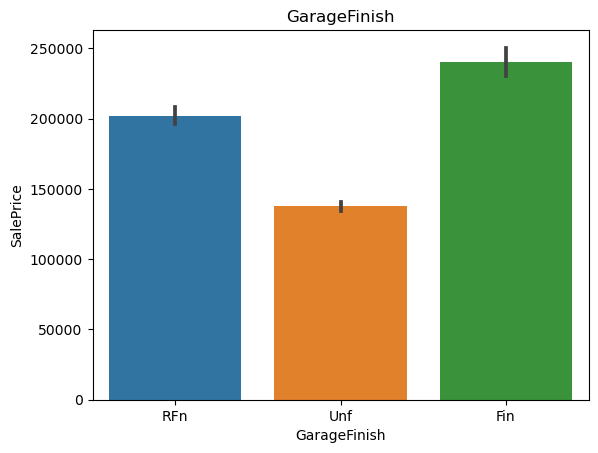

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


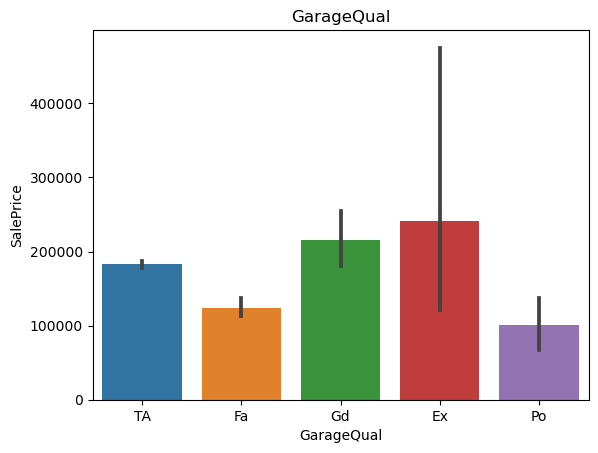

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


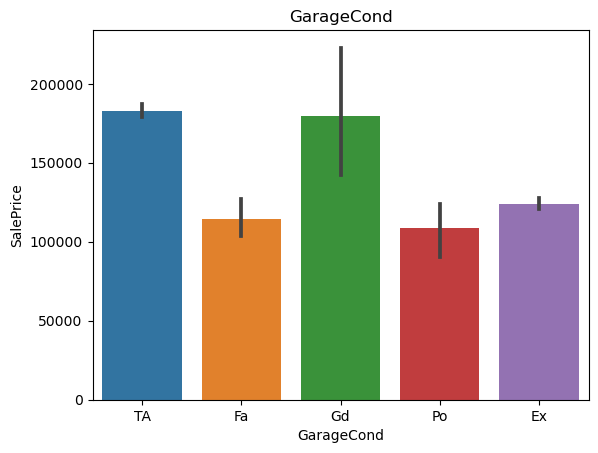

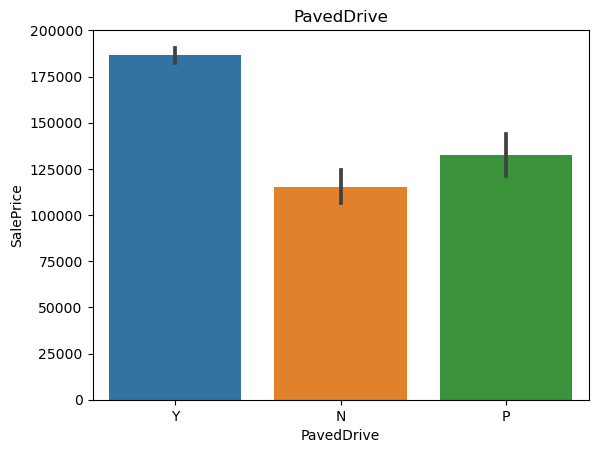

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


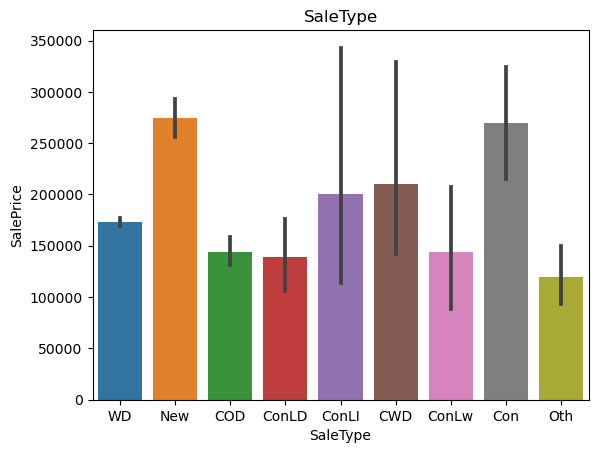

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


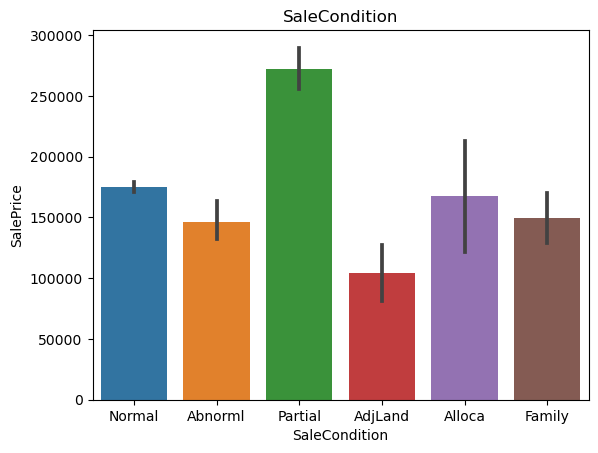

In [56]:
for feature in categorical:
    #df_train.groupby(feature)['SalePrice'].median().plot.bar()
    sns.barplot(x = df_train[feature] , y = df_train["SalePrice"])
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

**ORDINAL**

In [57]:
from pandas.api.types import CategoricalDtype

In [58]:
df_train['BsmtCond'].unique() ## cardinality of categorical variables

array(['TA', 'Gd', 'Fa', 'Po'], dtype=object)

In [59]:
df_train['BsmtCond'].value_counts()

TA    2688
Gd     122
Fa     104
Po       5
Name: BsmtCond, dtype: int64

In [60]:
df_train['BsmtCond'] = df_train['BsmtCond'].astype(CategoricalDtype(categories=['TA', 'Gd', 'Fa', 'Po'], ordered = True)).cat.codes

In [61]:
df_train['BsmtCond'].value_counts()

0    2688
1     122
2     104
3       5
Name: BsmtCond, dtype: int64

In [62]:
df_train['BsmtExposure'] = df_train['BsmtExposure'].astype(CategoricalDtype(categories=['NA', 'Mn', 'Av', 'Gd'], ordered = True)).cat.codes
df_train['BsmtFinType1'] = df_train['BsmtFinType1'].astype(CategoricalDtype(categories=['NA', 'Unf', 'LwQ', 'Rec', 'BLQ','ALQ', 'GLQ'], ordered = True)).cat.codes
df_train['BsmtFinType2'] = df_train['BsmtFinType2'].astype(CategoricalDtype(categories=['NA', 'Unf', 'LwQ', 'Rec', 'BLQ','ALQ', 'GLQ'], ordered = True)).cat.codes
df_train['BsmtQual'] = df_train['BsmtQual'].astype(CategoricalDtype(categories=['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df_train['ExterQual'] = df_train['ExterQual'].astype(CategoricalDtype(categories=['Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df_train['ExterCond'] = df_train['ExterCond'].astype(CategoricalDtype(categories=['Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df_train['Functional'] = df_train['Functional'].astype(CategoricalDtype(categories=['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod','Min2','Min1', 'Typ'], ordered = True)).cat.codes
df_train['GarageCond'] = df_train['GarageCond'].astype(CategoricalDtype(categories=['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df_train['GarageQual'] = df_train['GarageQual'].astype(CategoricalDtype(categories=['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df_train['GarageFinish'] = df_train['GarageFinish'].astype(CategoricalDtype(categories=['NA', 'Unf', 'RFn', 'Fin'], ordered = True)).cat.codes
df_train['HeatingQC'] = df_train['HeatingQC'].astype(CategoricalDtype(categories=['Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df_train['KitchenQual'] = df_train['KitchenQual'].astype(CategoricalDtype(categories=['Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df_train['PavedDrive'] = df_train['PavedDrive'].astype(CategoricalDtype(categories=['N', 'P', 'Y'], ordered = True)).cat.codes
df_train['Utilities'] = df_train['Utilities'].astype(CategoricalDtype(categories=['ELO', 'NASeWa', 'NASeWr', 'AllPub'], ordered = True)).cat.codes

In [63]:
ordinal = ["BsmtCond" , "BsmtExposure" , "BsmtFinType1" , "BsmtFinType2" , "BsmtQual" , "ExterQual" , "ExterCond" , "Functional",
          "GarageCond" , "GarageQual" , "GarageFinish" , "HeatingQC" , "KitchenQual" , "PavedDrive" , "Utilities"]

In [64]:
len(ordinal)

15

In [65]:
df_train.shape

(2919, 68)

In [66]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,PoolArea,MoSold,SaleType,SaleCondition,SalePrice
0,60,RL,4.189655,9.042040,Pave,Reg,Lvl,3,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.283204,3,2,PConc,4,0,-1,6,6.561031,1,5.017280,6.753438,GasA,4,Y,SBrkr,6.753438,6.751101,7.444833,1.0,0.0,2,1,3,1,3,8,7,0,Attchd,5.0,2,2.0,6.308098,3,3,2,0.000000,4.127134,0,2,WD,Normal,208500.0
1,20,RL,4.394449,9.169623,Pave,Reg,Lvl,3,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.000000,2,2,CBlock,4,0,3,5,6.886532,1,5.652489,7.141245,GasA,4,Y,SBrkr,7.141245,0.000000,7.141245,0.0,1.0,2,0,3,1,2,6,7,1,Attchd,31.0,2,2.0,6.133398,3,3,2,5.700444,0.000000,0,5,WD,Normal,181500.0
2,60,RL,4.234107,9.328212,Pave,IR1,Lvl,3,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.093750,3,2,PConc,4,0,1,6,6.188264,1,6.075346,6.825460,GasA,4,Y,SBrkr,6.825460,6.765039,7.488294,1.0,0.0,2,1,3,1,3,6,7,1,Attchd,7.0,2,2.0,6.411818,3,3,2,0.000000,3.761200,0,9,WD,Normal,223500.0
3,70,RL,4.110874,9.164401,Pave,IR1,Lvl,3,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000000,2,2,BrkTil,3,1,-1,5,5.379897,1,6.293419,6.629363,GasA,3,Y,SBrkr,6.869014,6.629363,7.448916,1.0,0.0,1,0,3,1,3,7,7,1,Detchd,8.0,1,3.0,6.466145,3,3,2,0.000000,3.583519,0,2,WD,Abnorml,140000.0
4,60,RL,4.442651,9.565284,Pave,IR1,Lvl,3,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.860786,3,2,PConc,4,0,2,6,6.486161,1,6.196444,7.044033,GasA,4,Y,SBrkr,7.044033,6.960348,7.695758,1.0,0.0,2,1,4,1,3,9,7,1,Attchd,8.0,2,3.0,6.729824,3,3,2,5.262690,4.442651,0,12,WD,Normal,250000.0


**Nominal**

* **One hot encoding**

In [67]:
#nominal = [feature for feature in categorical if feature not in ordinal ]

In [68]:
nominal = []
for feature in categorical:
    if feature not in ordinal:
        nominal.append(feature)
len(nominal)

23

In [69]:
#nominal = [feature for feature in categorical if feature not in ordinal]
for feature in nominal:
    print(feature , len(df_train[feature].unique()))

MSZoning 5
Street 2
LotShape 4
LandContour 4
LotConfig 5
LandSlope 3
Neighborhood 25
Condition1 9
Condition2 8
BldgType 5
HouseStyle 8
RoofStyle 6
RoofMatl 8
Exterior1st 15
Exterior2nd 16
MasVnrType 4
Foundation 6
Heating 6
CentralAir 2
Electrical 5
GarageType 6
SaleType 9
SaleCondition 6


In [70]:
new_nominal = ["Neighborhood" , "Exterior1st" , "Exterior2nd"]
#nominal1 = [feature for feature in nominal if feature not in new_nominal]

In [71]:
nominal1 = []
for feature in nominal:
    if feature not in new_nominal:
        nominal1.append(feature)
nominal1       

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'MasVnrType',
 'Foundation',
 'Heating',
 'CentralAir',
 'Electrical',
 'GarageType',
 'SaleType',
 'SaleCondition']

In [72]:
len(nominal1)

20

In [73]:
len(nominal)

23

In [74]:
nominal_variable = pd.get_dummies(df_train[nominal1], drop_first=True)
#nominal_variable.drop(new_nominal , axis = 1 , inplace = True)

In [75]:
nominal_variable.shape

(2919, 91)

In [76]:
nominal_variable.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


* **One hot encoding with many variables**

In [77]:
df_train["Neighborhood"].value_counts()

NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Name: Neighborhood, dtype: int64

In [78]:
def top_ten(feature):
    top_ten = []
    for x in feature.value_counts().sort_values(ascending = False).head(10).index:
        top_ten.append(x)
    return top_ten       

In [79]:
top_ten(df_train["Neighborhood"])

['NAmes',
 'CollgCr',
 'OldTown',
 'Edwards',
 'Somerst',
 'NridgHt',
 'Gilbert',
 'Sawyer',
 'NWAmes',
 'SawyerW']

In [80]:
top_10_Neighborhood = top_ten(df_train["Neighborhood"])
top_10_Exterior1st =  top_ten(df_train["Exterior1st"])
top_10_Exterior2nd =  top_ten(df_train["Exterior2nd"])

In [81]:
df_train["Exterior1st"].unique()

array(['VinylSd', 'MetalSd', 'Wd Sdng', 'HdBoard', 'BrkFace', 'WdShing',
       'CemntBd', 'Plywood', 'AsbShng', 'Stucco', 'BrkComm', 'AsphShn',
       'Stone', 'ImStucc', 'CBlock'], dtype=object)

In [82]:
df_train["Exterior2nd"].unique()

array(['VinylSd', 'MetalSd', 'Wd Shng', 'HdBoard', 'Plywood', 'Wd Sdng',
       'CmentBd', 'BrkFace', 'Stucco', 'AsbShng', 'Brk Cmn', 'ImStucc',
       'AsphShn', 'Stone', 'Other', 'CBlock'], dtype=object)

In [83]:
for label in top_10_Neighborhood:
    print(label)

NAmes
CollgCr
OldTown
Edwards
Somerst
NridgHt
Gilbert
Sawyer
NWAmes
SawyerW


In [84]:
#top_10_Neighborhood = [x for x in df_train.Neighborhood.value_counts().sort_values(ascending=False).head(10).index]
#top_10_Exterior1st = [x for x in df_train.Exterior1st.value_counts().sort_values(ascending=False).head(10).index]
#top_10_Exterior2nd = [x for x in df_train.Exterior2nd.value_counts().sort_values(ascending=False).head(10).index]


for i in top_10_Neighborhood:
    df_train[i]= np.where(df_train["Neighborhood"]== i,1,0) 
    
for label in top_10_Exterior1st:
    df_train[label]= np.where(df_train["Exterior1st"]==label,1,0)
    
#for label in top_10_Exterior2nd:a
    #df_train[label]= np.where(df_train["Exterior2nd"]==label,1,0)
    
#df_train[top_10_Exterior2nd].head()

In [85]:
df_train[top_10_Exterior1st].head()

,VinylSd,MetalSd,HdBoard,Wd Sdng,Plywood,CemntBd,BrkFace,WdShing,AsbShng,Stucco
0,1,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0


In [86]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,PoolArea,MoSold,SaleType,SaleCondition,SalePrice,NAmes,CollgCr,OldTown,Edwards,Somerst,NridgHt,Gilbert,Sawyer,NWAmes,SawyerW,VinylSd,MetalSd,HdBoard,Wd Sdng,Plywood,CemntBd,BrkFace,WdShing,AsbShng,Stucco
0,60,RL,4.189655,9.042040,Pave,Reg,Lvl,3,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.283204,3,2,PConc,4,0,-1,6,6.561031,1,5.017280,6.753438,GasA,4,Y,SBrkr,6.753438,6.751101,7.444833,1.0,0.0,2,1,3,1,3,8,7,0,Attchd,5.0,2,2.0,6.308098,3,3,2,0.000000,4.127134,0,2,WD,Normal,208500.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,20,RL,4.394449,9.169623,Pave,Reg,Lvl,3,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.000000,2,2,CBlock,4,0,3,5,6.886532,1,5.652489,7.141245,GasA,4,Y,SBrkr,7.141245,0.000000,7.141245,0.0,1.0,2,0,3,1,2,6,7,1,Attchd,31.0,2,2.0,6.133398,3,3,2,5.700444,0.000000,0,5,WD,Normal,181500.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,60,RL,4.234107,9.328212,Pave,IR1,Lvl,3,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.093750,3,2,PConc,4,0,1,6,6.188264,1,6.075346,6.825460,GasA,4,Y,SBrkr,6.825460,6.765039,7.488294,1.0,0.0,2,1,3,1,3,6,7,1,Attchd,7.0,2,2.0,6.411818,3,3,2,0.000000,3.761200,0,9,WD,Normal,223500.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,70,RL,4.110874,9.164401,Pave,IR1,Lvl,3,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000000,2,2,BrkTil,3,1,-1,5,5.379897,1,6.293419,6.629363,GasA,3,Y,SBrkr,6.869014,6.629363,7.448916,1.0,0.0,1,0,3,1,3,7,7,1,Detchd,8.0,1,3.0,6.466145,3,3,2,0.000000,3.583519,0,2,WD,Abnorml,140000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,60,RL,4.442651,9.565284,Pave,IR1,Lvl,3,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.860786,3,2,PConc,4,0,2,6,6.486161,1,6.196444,7.044033,GasA,4,Y,SBrkr,7.044033,6.960348,7.695758,1.0,0.0,2,1,4,1,3,9,7,1,Attchd,8.0,2,3.0,6.729824,3,3,2,5.262690,4.442651,0,12,WD,Normal,250000.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [87]:
df_train.drop(nominal , axis = 1 , inplace = True)

In [88]:
df_train.head()

,MSSubClass,LotFrontage,LotArea,Utilities,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,PoolArea,MoSold,SalePrice,NAmes,CollgCr,OldTown,Edwards,Somerst,NridgHt,Gilbert,Sawyer,NWAmes,SawyerW,VinylSd,MetalSd,HdBoard,Wd Sdng,Plywood,CemntBd,BrkFace,WdShing,AsbShng,Stucco
0,60,4.189655,9.042040,3,7,5,5,5,5.283204,3,2,4,0,-1,6,6.561031,1,5.017280,6.753438,4,6.753438,6.751101,7.444833,1.0,0.0,2,1,3,1,3,8,7,0,5.0,2,2.0,6.308098,3,3,2,0.000000,4.127134,0,2,208500.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,20,4.394449,9.169623,3,6,8,31,31,0.000000,2,2,4,0,3,5,6.886532,1,5.652489,7.141245,4,7.141245,0.000000,7.141245,0.0,1.0,2,0,3,1,2,6,7,1,31.0,2,2.0,6.133398,3,3,2,5.700444,0.000000,0,5,181500.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,60,4.234107,9.328212,3,7,5,7,6,5.093750,3,2,4,0,1,6,6.188264,1,6.075346,6.825460,4,6.825460,6.765039,7.488294,1.0,0.0,2,1,3,1,3,6,7,1,7.0,2,2.0,6.411818,3,3,2,0.000000,3.761200,0,9,223500.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,70,4.110874,9.164401,3,7,5,91,36,0.000000,2,2,3,1,-1,5,5.379897,1,6.293419,6.629363,3,6.869014,6.629363,7.448916,1.0,0.0,1,0,3,1,3,7,7,1,8.0,1,3.0,6.466145,3,3,2,0.000000,3.583519,0,2,140000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,60,4.442651,9.565284,3,8,5,8,8,5.860786,3,2,4,0,2,6,6.486161,1,6.196444,7.044033,4,7.044033,6.960348,7.695758,1.0,0.0,2,1,4,1,3,9,7,1,8.0,2,3.0,6.729824,3,3,2,5.262690,4.442651,0,12,250000.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [89]:
df_train.shape

(2919, 65)

In [90]:
train = pd.concat([nominal_variable , df_train] , axis = 1)

In [91]:
train.shape

(2919, 156)

In [92]:
train.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,MSSubClass,LotFrontage,LotArea,Utilities,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,PoolArea,MoSold,SalePrice,NAmes,CollgCr,OldTown,Edwards,Somerst,NridgHt,Gilbert,Sawyer,NWAmes,SawyerW,VinylSd,MetalSd,HdBoard,Wd Sdng,Plywood,CemntBd,BrkFace,WdShing,AsbShng,Stucco
0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,60,4.189655,9.042040,3,7,5,5,5,5.283204,3,2,4,0,-1,6,6.561031,1,5.017280,6.753438,4,6.753438,6.751101,7.444833,1.0,0.0,2,1,3,1,3,8,7,0,5.0,2,2.0,6.308098,3,3,2,0.000000,4.127134,0,2,208500.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,20,4.394449,9.169623,3,6,8,31,31,0.000000,2,2,4,0,3,5,6.886532,1,5.652489,7.141245,4,7.141245,0.000000,7.141245,0.0,1.0,2,0,3,1,2,6,7,1,31.0,2,2.0,6.133398,3,3,2,5.700444,0.000000,0,5,181500.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,60,4.234107,9.328212,3,7,5,7,6,5.093750,3,2,4,0,1,6,6.188264,1,6.075346,6.825460,4,6.825460,6.765039,7.488294,1.0,0.0,2,1,3,1,3,6,7,1,7.0,2,2.0,6.411818,3,3,2,0.000000,3.761200,0,9,223500.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,70,4.110874,9.164401,3,7,5,91,36,0.000000,2,2,3,1,-1,5,5.379897,1,6.293419,6.629363,3,6.869014,6.629363,7.448916,1.0,0.0,1,0,3,1,3,7,7,1,8.0,1,3.0,6.466145,3,3,2,0.000000,3.583519,0,2,140000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,60,4.442651,9.565284,3,8,5,8,8,5.860786,3,2,4,0,2,6,6

In [93]:
train.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [94]:
#preview the df
#train =  train.loc[:,~ train.columns.duplicated()]
#train.shape

In [95]:
train.isnull().sum().sum()

1459

### split data into test and train

In [96]:
train_df = train.iloc[:1460, :]
test1 = train.iloc[1460: , :]

print(train_df.shape)
print(test1.shape)
#print(len(y_train))

(1460, 156)
(1459, 156)


In [97]:
test1['SalePrice']

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
1454   NaN
1455   NaN
1456   NaN
1457   NaN
1458   NaN
Name: SalePrice, Length: 1459, dtype: float64

In [98]:
test1.shape

(1459, 156)

In [99]:
test = test1.drop("SalePrice" , axis = 1)
test.shape

(1459, 155)

In [100]:
X = train_df.drop("SalePrice" , axis = 1)
y = train_df["SalePrice"]

In [101]:
X.shape

(1460, 155)

In [102]:
y.shape

(1460,)

## Feature Selection

In [103]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [104]:
print(model.feature_importances_)

[2.33843466e-04 6.63218513e-05 3.14871676e-03 3.13519217e-03
 3.20277682e-05 2.31079674e-03 2.52777127e-04 2.45986577e-03
 7.46424338e-04 1.34024977e-03 1.96304127e-03 1.76087939e-03
 4.06759839e-04 3.06052060e-05 2.46830927e-03 1.28797431e-03
 3.96293767e-04 3.50758648e-04 1.52618015e-03 1.12644038e-04
 6.86375688e-04 7.08292193e-05 1.16082235e-04 5.56272896e-06
 1.27728425e-05 2.05571526e-05 2.06137193e-04 4.47311997e-05
 4.64541000e-04 2.16925439e-06 1.66676986e-08 1.43399347e-06
 1.03347009e-04 1.49644688e-04 1.77628493e-04 5.32787679e-04
 3.95820501e-05 8.77856083e-04 1.77398282e-04 5.58225894e-05
 1.71681908e-03 5.69043672e-05 2.06314944e-04 1.12605091e-03
 2.99164902e-04 1.56094298e-03 3.41539532e-05 2.20196465e-05
 6.02733255e-04 8.23246153e-05 1.20578726e-05 3.95684901e-07
 7.80260908e-05 1.96742789e-05 5.07155783e-04 1.36357933e-03
 8.51731372e-04 1.53787901e-03 8.24298849e-04 1.16352074e-03
 5.62292968e-05 2.68791968e-05 3.81136896e-05 1.79111951e-04
 1.92455121e-04 1.965193

In [105]:
X.columns

Index(['MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'Street_Pave', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg',
       'LandContour_HLS', 'LandContour_Low',
       ...
       'VinylSd', 'MetalSd', 'HdBoard', 'Wd Sdng', 'Plywood', 'CemntBd',
       'BrkFace', 'WdShing', 'AsbShng', 'Stucco'],
      dtype='object', length=155)

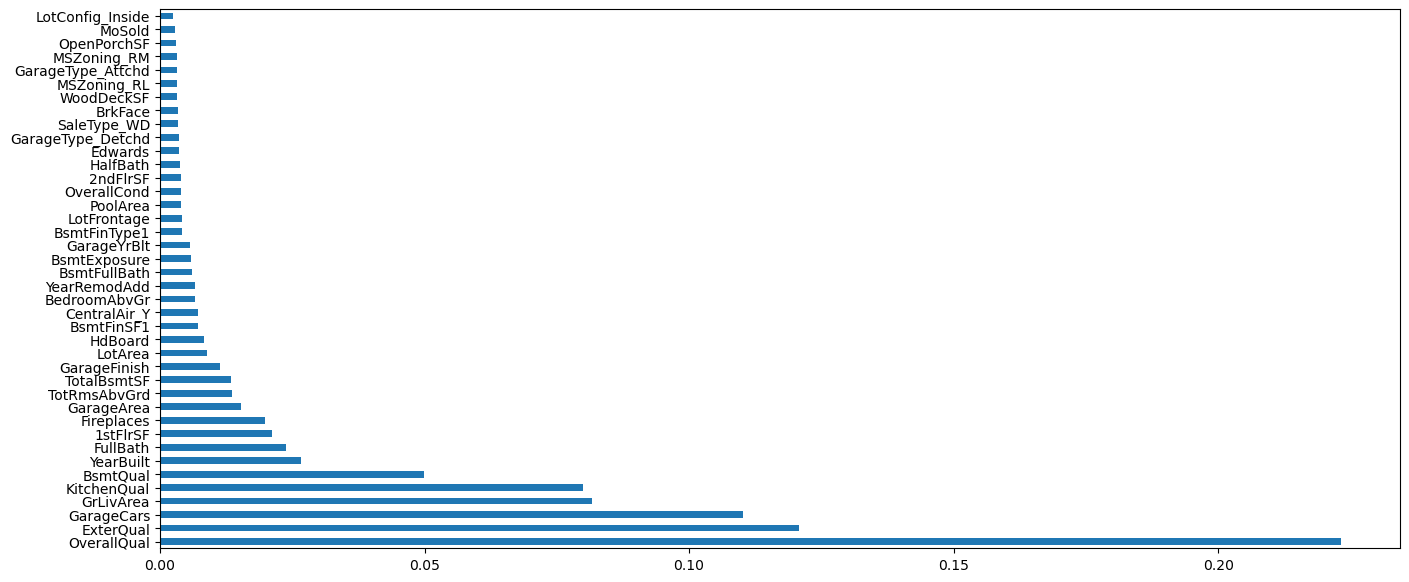

In [106]:
plt.figure(figsize = (16 , 7))
ranked_features =  pd.Series(model.feature_importances_, index = X.columns)
ranked_features.nlargest(40).plot(kind='barh')
plt.show()

In [107]:
features = ranked_features.nlargest(23)

In [108]:
features.index

Index(['OverallQual', 'ExterQual', 'GarageCars', 'GrLivArea', 'KitchenQual',
       'BsmtQual', 'YearBuilt', 'FullBath', '1stFlrSF', 'Fireplaces',
       'GarageArea', 'TotRmsAbvGrd', 'TotalBsmtSF', 'GarageFinish', 'LotArea',
       'HdBoard', 'BsmtFinSF1', 'CentralAir_Y', 'BedroomAbvGr', 'YearRemodAdd',
       'BsmtFullBath', 'BsmtExposure', 'GarageYrBlt'],
      dtype='object')

In [109]:
X = train_df[features.index]

In [110]:
X.shape

(1460, 23)

In [111]:
X.head()

,OverallQual,ExterQual,GarageCars,GrLivArea,KitchenQual,BsmtQual,YearBuilt,FullBath,1stFlrSF,Fireplaces,GarageArea,TotRmsAbvGrd,TotalBsmtSF,GarageFinish,LotArea,HdBoard,BsmtFinSF1,CentralAir_Y,BedroomAbvGr,YearRemodAdd,BsmtFullBath,BsmtExposure,GarageYrBlt
0,7,3,2.0,7.444833,3,4,5,2,6.753438,0,6.308098,8,6.753438,2,9.042040,0,6.561031,1,3,5,1.0,-1,5.0
1,6,2,2.0,7.141245,2,4,31,2,7.141245,1,6.133398,6,7.141245,2,9.169623,0,6.886532,1,3,31,0.0,3,31.0
2,7,3,2.0,7.488294,3,4,7,2,6.825460,1,6.411818,6,6.825460,2,9.328212,0,6.188264,1,3,6,1.0,1,7.0
3,7,2,3.0,7.448916,3,3,91,1,6.869014,1,6.466145,7,6.629363,1,9.164401,0,5.379897,1,3,36,1.0,-1,8.0
4,8,3,3.0,7.695758,3,4,8,2,7.044033,1,6.729824,9,7.044033,2,9.565284,0,6.486161,1,4,8,1.0,2,8.0


## Model Building

In [112]:
# split dataset into train and test
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

### Robost scaller

In [113]:
test1 = test[features.index]

In [114]:
test1.shape

(1459, 23)

In [115]:
# scaling dataset with robust scaler
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
test1 = scaler.transform(test1)

In [116]:
X_train

array([[ 0.        ,  1.        ,  0.        , ...,  0.        ,
         0.        , -0.48717949],
       [-0.5       ,  0.        , -1.        , ...,  1.        ,
         0.        ,  0.02564103],
       [-0.5       ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.25641026],
       ...,
       [-1.5       ,  0.        , -1.        , ...,  0.        ,
         0.        ,  1.41025641],
       [-0.5       ,  0.        , -1.        , ...,  0.        ,
         0.        ,  0.41025641],
       [-1.        ,  0.        ,  0.        , ...,  1.        ,
         0.        ,  0.43589744]])

### Linear Regression

In [117]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error # for calculating mean_squared error
from sklearn.metrics import r2_score # for measering the goodness of best fit line

reg = LinearRegression()
reg.fit(X_train , y_train)

y_pred = reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test , y_pred))

score=r2_score(y_test,y_pred)
print(f"value of R^2 is {score}")
print(f"rmse value is {rmse}")

value of R^2 is 0.8058874037664582
rmse value is 35493.549138057635


In [118]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train , y_train)

prediction = model.predict(X_test)

score = r2_score(y_test , prediction)
print(score)

0.7900489480255473


### Random Forest

In [119]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
score_rf = r2_score(y_test,y_pred_rf)
rmse = np.sqrt(mean_squared_error(y_test , y_pred_rf))


print(f"value of R^2 is {score_rf}")
print(f"rmse value is {rmse}")

value of R^2 is 0.8888585200280195
rmse value is 26857.195281522298


In [120]:
from sklearn.model_selection import cross_val_score
cross_validation = cross_val_score(estimator =rf, X = X_train,y = y_train, cv = 10)
print("Cross validation accuracy of random forest model = ", cross_validation)
print("\nCross validation mean accuracy of random forest model = ", cross_validation.mean())

Cross validation accuracy of random forest model =  [0.52080683 0.84284794 0.70960262 0.91609894 0.86101916 0.91810571
 0.89407015 0.78173162 0.87335433 0.89156511]

Cross validation mean accuracy of random forest model =  0.8209202411576696


### Xgboost

In [147]:
!pip install xgboost
import xgboost
xgb_model = xgboost.XGBRegressor()
xgb_model.fit(X_train,y_train)


y_pred_xg = xgb_model.predict(X_test)
score_xg=r2_score(y_test,y_pred_xg)
rmse = np.sqrt(mean_squared_error(y_test , y_pred_xg))


print(f"value of R^2 is {score_xg}")
print(f"rmse value is {rmse}")

value of R^2 is 0.9082252916948635
rmse value is 24405.295787585907


In [148]:
from sklearn.model_selection import cross_val_score
cross_validation = cross_val_score(estimator = xgb_model, X = X_train,y = y_train, cv = 10)
print("Cross validation accuracy of xgboost model = ", cross_validation)
print("\nCross validation mean accuracy of xgboost model = ", cross_validation.mean())

Cross validation accuracy of xgboost model =  [0.55093993 0.83593915 0.82087717 0.88221605 0.88378844 0.88997837
 0.89228604 0.78340941 0.88869476 0.89210088]

Cross validation mean accuracy of xgboost model =  0.8320230214304287


In [123]:
y_pred_hyper = xgb_model.predict(test1)
y_pred_hyper

array([118236.88, 142638.38, 164618.9 , ..., 152604.06, 103022.8 ,
       203593.14], dtype=float32)

In [124]:
df = pd.read_csv("test.csv" , usecols = ["Id"])

In [125]:
df.head()

,Id
0,1461
1,1462
2,1463
3,1464
4,1465


In [126]:
submit_test1 = pd.concat([df["Id"], pd.DataFrame(y_pred_hyper)], axis=1)
submit_test1.columns=['Id', 'SalePrice']

In [127]:
submit_test1.head(20)

,Id,SalePrice
0,1461,118236.882812
1,1462,142638.375000
2,1463,164618.906250
3,1464,172812.578125
4,1465,198136.859375
5,1466,172658.296875
6,1467,169620.828125
7,1468,167185.312500
8,1469,177609.390625
9,1470,124606.195312


In [128]:
submit_test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         1459 non-null   int64  
 1   SalePrice  1459 non-null   float32
dtypes: float32(1), int64(1)
memory usage: 17.2 KB


In [129]:
#submit_test1 = submit_test1.astype({'Id': 'int', 'SalePrice': 'float'})

In [130]:
submit_test1.to_csv('sample_submission.csv', index=False)

In [131]:
#df = pd.read_csv("sample_submission.csv")
#df

### Hyper parameter tuning

In [132]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV

In [133]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split

#criterion = ["squared_error" , "absolute_error" , "poisson"]

max_features = ['auto', 'sqrt', "log2"]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [134]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               #'criterion' : criterion,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [135]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 5, verbose=2, n_jobs = -1 , random_state = 5)

In [136]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\HP\anaconda3\Lib\site-packages\sklearn\utils\_

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=5, verbose=2)

In [137]:
rf_random.best_params_

{'n_estimators': 300,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 15}

In [151]:
prediction = rf_random.predict(X_test)
score_rf=r2_score(y_test,prediction)


print(f"value of R^2 is {score_rf}")
print('RMSE:', np.sqrt(mean_squared_error(y_test, prediction)))

value of R^2 is 0.8808681247230203
RMSE: 27805.874498821704


In [152]:
y_pred_hyper = rf_random.predict(test1)
y_pred_hyper

array([123736.92409546, 150874.20940273, 179306.21113439, ...,
       160030.30445046, 115178.77578333, 220957.84103162])

### Hyper parameter tuning with Xgboost

In [140]:
params = {
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [153]:
xgb = RandomizedSearchCV(xgb_model,param_distributions=params,n_iter=10,scoring='r2',n_jobs=-1,cv=5,verbose=3)

In [142]:
xgb.fit(X_train , y_train)
y_pred = xgb.predict(test1)
y_pred

Fitting 5 folds for each of 10 candidates, totalling 50 fits


array([127520.65, 151757.52, 173790.16, ..., 161451.66, 122625.96,
       224919.56], dtype=float32)

In [143]:
prediction = xgb.predict(X_test)
score_rf=r2_score(y_test,prediction)


print(f"value of R^2 is {score_rf}")
print('RMSE:', np.sqrt(mean_squared_error(y_test, prediction)))

value of R^2 is 0.8804450044076136
RMSE: 27855.20975119716


In [144]:
df = pd.read_csv("test.csv" , usecols = ["Id"])
submit_test1 = pd.concat([df["Id"], pd.DataFrame(y_pred)], axis=1)
submit_test1.columns=['Id', 'SalePrice']

In [145]:
# submit_test1 = submit_test1.astype({'Id': 'int', 'SalePrice': 'float'})
submit_test1.to_csv('sample_submission.csv', index=False)

In [146]:
submit_test1

,Id,SalePrice
0,1461,127520.648438
1,1462,151757.515625
2,1463,173790.156250
3,1464,182944.406250
4,1465,187349.250000
...,...,...
1454,2915,83039.781250
1455,2916,92214.781250
1456,2917,161451.656250
1457,2918,122625.960938
